In [1]:
import math as math
import matplotlib.pyplot as plt

In [2]:
def cubesGenerator(colors):
    cubes = []
    cube = []
    pair = []
    for i in range(180):
        pair.append(colors[i])
        if( (i+1) %2 == 0):
            cube.append(pair)
            pair = []
        if( (i+1) %6 == 0 ):
            cubes.append(cube)
            cube = []
    return cubes

The plan is to use a stack to implement DFS brute force through the given puzzles. I always want to do a histogram of the colors each puzzle and see what analysis I can do to understand each puzzle.

In [3]:
class Stack():
    def __init__(self):
        self.stack = []
    def push(self, a):
        self.stack.insert(0,a)
    def pop(self):
        return self.stack.pop(0)
    def top(self):
        print(self.stack[0])
    def size(self):
        return len(self.stack)

Testing Stack

In [4]:
stack = Stack()

stack.push(3)

print(stack.size())

stack.top()

print(stack.pop())

1
3
3


Implementing the Depth First Search

In [5]:
color1 = [(1 + math.floor( i * math.pi % 30)) for i in range(1,181)]

In [6]:
print(len(color1))
print(color1)
cubes1 = cubesGenerator(color1)
print(len(cubes1))
for i in range(30):
    print(cubes1[i])
print(color1)

180
[4, 7, 10, 13, 16, 19, 22, 26, 29, 2, 5, 8, 11, 14, 18, 21, 24, 27, 30, 3, 6, 10, 13, 16, 19, 22, 25, 28, 2, 5, 8, 11, 14, 17, 20, 24, 27, 30, 3, 6, 9, 12, 16, 19, 22, 25, 28, 1, 4, 8, 11, 14, 17, 20, 23, 26, 30, 3, 6, 9, 12, 15, 18, 22, 25, 28, 1, 4, 7, 10, 14, 17, 20, 23, 26, 29, 2, 6, 9, 12, 15, 18, 21, 24, 28, 1, 4, 7, 10, 13, 16, 20, 23, 26, 29, 2, 5, 8, 12, 15, 18, 21, 24, 27, 30, 4, 7, 10, 13, 16, 19, 22, 25, 29, 2, 5, 8, 11, 14, 17, 21, 24, 27, 30, 3, 6, 9, 13, 16, 19, 22, 25, 28, 1, 5, 8, 11, 14, 17, 20, 23, 27, 30, 3, 6, 9, 12, 15, 19, 22, 25, 28, 1, 4, 7, 11, 14, 17, 20, 23, 26, 29, 3, 6, 9, 12, 15, 18, 21, 25, 28, 1, 4, 7, 10, 13, 17, 20, 23, 26]
30
[[4, 7], [10, 13], [16, 19]]
[[22, 26], [29, 2], [5, 8]]
[[11, 14], [18, 21], [24, 27]]
[[30, 3], [6, 10], [13, 16]]
[[19, 22], [25, 28], [2, 5]]
[[8, 11], [14, 17], [20, 24]]
[[27, 30], [3, 6], [9, 12]]
[[16, 19], [22, 25], [28, 1]]
[[4, 8], [11, 14], [17, 20]]
[[23, 26], [30, 3], [6, 9]]
[[12, 15], [18, 22], [25, 28]]
[[1,

In [7]:
def DFS(cubes,index):
    
    # visited structure that mirrors the cubes but with only true and false values
    visited = [[False, False,False] for i in range(len(cubes))]
    thread1 = [[False, False,False] for i in range(len(cubes))]
    thread2 = [[False, False,False] for i in range(len(cubes))]
    
    # array same size as the number of colors to keep track of multiplicity
    multiplicity = [0 for i in range(30)]
    
    good = True
    
    # variable to keep track of the cube we are on
    tracker = index
    
    # will store all half solutions that are found
    halfSolutions = []
    # will build the current half solution here
    halfSolution = []
    
    
    # stack keep track of the search
    s = Stack()
    # push in the first cube's pair based on the index
    s.push([cubes[0][index],index])
    # add the first entry to the half solution
    halfSolution.append([cubes[0][index], index])
    
    
    
    # will run as long as the stack is not empty
    # might have to change this to not stop until a certain iteration is met
    # i want every possibility to be run through - brute force unfortunately
    while(s.size() != 0):
        
        print("This ran")
        
        # variable to store the current node
        pair = s.pop()
                
        if( (multiplicity[pair[0][0]] < 3) and (multiplicity[pair[0][1]] < 3) ):
            multiplicity[pair[0][0]] += 1
            multiplicity[pair[0][1]] += 1
        
        # if i make it to the 30th cube and it works I want to save this half solution
        if(pair[1] == 29):
            # halfSolution is saved to halfSolutions
            halfSolutions.append(halfSolution)
            # clears halfSolution but maybe I just want to go back far enough to the last
            # decision point where I can explore and an unexplored path
            # maybe after I clear I can create a helper functions to restore the halfSolution until
            # where I need it to be
            halfSolution = []
            
            # i think i would want to call the helper function right here
            # i need to figure out how to save the state
            # halfSolution = hSRebuild()
            
        # here i'll be building the half solution and explore every branch in numerical order
        for i in range(3):
            if ( (visited[pair[1]+1][i] == False) and (multiplicity[cubes[pair[1]+1][i][0]] < 3 and multiplicity[cubes[pair[1]+1][i][1]] < 3) ): 
                s.push([cubes[pair[1]+1][i],i])
                halfSolution.append(cubes[pair[1]+1][i])                
                print("This ran")     
    
    if(len(halfSolutions) == 0):
        print("No half solutions found starting from index ", index)
        
    return halfSolutions

In [8]:
cube1HalfSolutions = DFS(cubes1,0)
print(cube1HalfSolutions)

# it seems like the lists might not be aligned and the stack is growing largers than the indeces expect

This ran
This ran
This ran
This ran
This ran


IndexError: list index out of range

Implement the color generators.

Puzzle 1 Color Generator

In [26]:

color2 = [(1 + math.floor( i * math.e % 30)) for i in range(1,181)]
color3 = [(1 + math.floor( i * math.sqrt(3) ) % 30) for i in range(1,181)]
color4 = [(1 + math.floor( i * math.sqrt(5)) % 30) for i in range(1,181)]

180
[3, 6, 9, 11, 14, 17, 20, 22, 25, 28, 30, 3, 6, 9, 11, 14, 17, 19, 22, 25, 28, 30, 3, 6, 8, 11, 14, 17, 19, 22, 25, 27, 30, 3, 6, 8, 11, 14, 17, 19, 22, 25, 27, 30, 3, 6, 8, 11, 14, 16, 19, 22, 25, 27, 30, 3, 5, 8, 11, 14, 16, 19, 22, 24, 27, 30, 3, 5, 8, 11, 13, 16, 19, 22, 24, 27, 30, 3, 5, 8, 11, 13, 16, 19, 22, 24, 27, 30, 2, 5, 8, 11, 13, 16, 19, 21, 24, 27, 30, 2, 5, 8, 10, 13, 16, 19, 21, 24, 27, 30, 2, 5, 8, 10, 13, 16, 19, 21, 24, 27, 29, 2, 5, 8, 10, 13, 16, 18, 21, 24, 27, 29, 2, 5, 7, 10, 13, 16, 18, 21, 24, 26, 29, 2, 5, 7, 10, 13, 16, 18, 21, 24, 26, 29, 2, 5, 7, 10, 13, 15, 18, 21, 24, 26, 29, 2, 4, 7, 10, 13, 15, 18, 21, 23, 26, 29, 2, 4, 7, 10]
30
[[3, 6], [9, 11], [14, 17]]
[[20, 22], [25, 28], [30, 3]]
[[6, 9], [11, 14], [17, 19]]
[[22, 25], [28, 30], [3, 6]]
[[8, 11], [14, 17], [19, 22]]
[[25, 27], [30, 3], [6, 8]]
[[11, 14], [17, 19], [22, 25]]
[[27, 30], [3, 6], [8, 11]]
[[14, 16], [19, 22], [25, 27]]
[[30, 3], [5, 8], [11, 14]]
[[16, 19], [22, 24], [27, 30]]


(array([19., 20., 20., 19.,  8., 19., 19., 19., 19., 18.]),
 array([ 2. ,  4.8,  7.6, 10.4, 13.2, 16. , 18.8, 21.6, 24.4, 27.2, 30. ]),
 <a list of 10 Patch objects>)

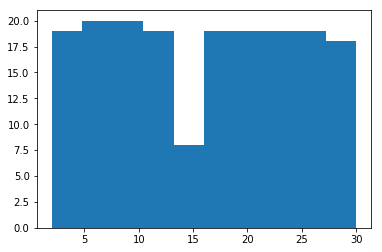

In [27]:
print(len(color2))
print(color2)
cubes2 = cubesGenerator(color2)
print(len(cubes2))
for i in range(30):
    print(cubes2[i])
color2.sort()
print(color2)
plt.hist(color2)

180
[2, 4, 6, 7, 9, 11, 13, 14, 16, 18, 20, 21, 23, 25, 26, 28, 30, 2, 3, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24, 26, 28, 29, 1, 3, 5, 6, 8, 10, 12, 13, 15, 17, 18, 20, 22, 24, 25, 27, 29, 1, 2, 4, 6, 7, 9, 11, 13, 14, 16, 18, 20, 21, 23, 25, 27, 28, 30, 2, 3, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 23, 24, 26, 28, 29, 1, 3, 5, 6, 8, 10, 12, 13, 15, 17, 19, 20, 22, 24, 25, 27, 29, 1, 2, 4, 6, 8, 9, 11, 13, 14, 16, 18, 20, 21, 23, 25, 27, 28, 30, 2, 4, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 23, 24, 26, 28, 30, 1, 3, 5, 6, 8, 10, 12, 13, 15, 17, 19, 20, 22, 24, 26, 27, 29, 1, 2, 4, 6, 8, 9, 11, 13, 15, 16, 18, 20, 21, 23, 25, 27, 28, 30, 2, 4, 5, 7, 9, 11, 12]
30
[[2, 4], [6, 7], [9, 11]]
[[13, 14], [16, 18], [20, 21]]
[[23, 25], [26, 28], [30, 2]]
[[3, 5], [7, 9], [10, 12]]
[[14, 16], [17, 19], [21, 22]]
[[24, 26], [28, 29], [1, 3]]
[[5, 6], [8, 10], [12, 13]]
[[15, 17], [18, 20], [22, 24]]
[[25, 27], [29, 1], [2, 4]]
[[6, 7], [9, 11], [13, 14]]
[[16, 18], [20, 21], [23, 25]]
[[27, 28],

(array([19., 20., 19., 18., 17., 18., 19., 16., 17., 17.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

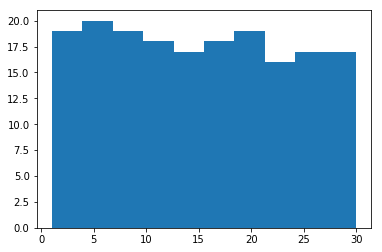

In [28]:
print(len(color3))
print(color3)
cubes3 = cubesGenerator(color3)
print(len(cubes3))
for i in range(30):
    print(cubes3[i])
color3.sort()
print(color3)
plt.hist(color3)

180
[3, 5, 7, 9, 12, 14, 16, 18, 21, 23, 25, 27, 30, 2, 4, 6, 9, 11, 13, 15, 17, 20, 22, 24, 26, 29, 1, 3, 5, 8, 10, 12, 14, 17, 19, 21, 23, 25, 28, 30, 2, 4, 7, 9, 11, 13, 16, 18, 20, 22, 25, 27, 29, 1, 3, 6, 8, 10, 12, 15, 17, 19, 21, 24, 26, 28, 30, 3, 5, 7, 9, 11, 14, 16, 18, 20, 23, 25, 27, 29, 2, 4, 6, 8, 11, 13, 15, 17, 20, 22, 24, 26, 28, 1, 3, 5, 7, 10, 12, 14, 16, 19, 21, 23, 25, 28, 30, 2, 4, 6, 9, 11, 13, 15, 18, 20, 22, 24, 27, 29, 1, 3, 6, 8, 10, 12, 14, 17, 19, 21, 23, 26, 28, 30, 2, 5, 7, 9, 11, 14, 16, 18, 20, 22, 25, 27, 29, 1, 4, 6, 8, 10, 13, 15, 17, 19, 22, 24, 26, 28, 1, 3, 5, 7, 9, 12, 14, 16, 18, 21, 23, 25, 27, 30, 2, 4, 6, 9, 11, 13]
30
[[3, 5], [7, 9], [12, 14]]
[[16, 18], [21, 23], [25, 27]]
[[30, 2], [4, 6], [9, 11]]
[[13, 15], [17, 20], [22, 24]]
[[26, 29], [1, 3], [5, 8]]
[[10, 12], [14, 17], [19, 21]]
[[23, 25], [28, 30], [2, 4]]
[[7, 9], [11, 13], [16, 18]]
[[20, 22], [25, 27], [29, 1]]
[[3, 6], [8, 10], [12, 15]]
[[17, 19], [21, 24], [26, 28]]
[[30, 3]

(array([19., 19., 19., 18., 18., 18., 17., 17., 18., 17.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

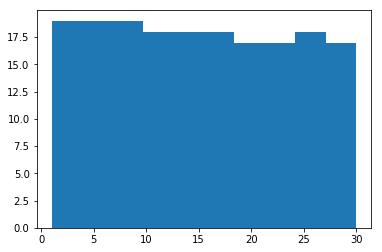

In [29]:
print(len(color4))
print(color4)
cubes4 = cubesGenerator(color4)
print(len(cubes4))
for i in range(30):
    print(cubes4[i])
color4.sort()
print(color4)
plt.hist(color4)

I've managed to split the colors into cubes. I think I need to split the colors into pairs for each cube. Then put all the pairs into three sets of lists. Then design the DFS algorithm around it.

The nature of DFS is to go through each set until it reaches the end.

Since the color pair indeces will be numbered, it will simply choose the lower indexed color pair first. 

If it reaches the end but length of the list is less than 30 then its not a half solution.

If a color appears more than twice then we have to check another branch.

If it finds two half solutions then there is a complete solution.

*****************************************

One huge DFS

Find every possible half solution starting with a certain pair.

Then find every possible half solution with the second pair.

Then find every possible half solution with the third pair.

Save every half solution as a list of 30 numbers with each entry being 0, 1, or 2. If any half solutions do not match then we have complete solutions.

Then compare every half solution and see how many complete solutions there are.

If there are no half solutions then we need to go down a cube and the minimal obstacle decreases by one.

In [30]:
print(cubes1[0][0])

[4, 7]


In [31]:
# visited structure that mirrors the cubes but with only true and false values
visited = [[False, False,False] for i in range(30)]
for i in range(30):
    print(visited[i])

[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
